In [1]:
#Service Functions to be used in future
#Settle the directory business
import os

#dir_name is the full path name
def getFilesFromDirectory(dir_name,predict_prefix="prediction_"):
    
    if(os.path.isdir(dir_name) == False):
        print("directory name in invalid")
        return []
    files = os.listdir(dir_name)
    out_files = [myfile for myfile in files if os.path.isfile(os.path.join(dir_name,myfile)) and 
                                               myfile.find(predict_prefix,0,len(myfile)) >= 0]
    return out_files

#dir_name is the full path name
def getFoldersFromDirectory(dir_name):
    
    if(os.path.isdir(dir_name) == False):
        print("directory name in invalid")
        return []
    all_files = os.listdir(dir_name)
    out_dirs = [my_dir for my_dir in all_files if os.path.isdir(os.path.join(dir_name,my_dir))]
    return out_dirs

#integer to month, January is 1 and december is 12
def GetMonth(in_pred_file):
    
    strt_idx = (int)(in_pred_file.rfind('_'))+1
    stop_idx = (int)(in_pred_file.find('.'))
    int_month = (int)(in_pred_file[strt_idx:stop_idx])
    #print(int_month)
    if int_month<1 and int_month>12:
        print("Error:bad Input to GetMonth():")
        return ""
    month_dict = ["Jan","Feb","Mar","Apr","Mar","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    return month_dict[int_month-1]

def seeInValues():
    
    sum_of_actual = 0
    sum_of_predict = 0

    #Checking for one method_type
    for method_type in all_method_types[0:1]:

        method_type_dir = os.path.join(prediction_dir,method_type)
        #print(method_type+" extracting data.")

        all_crime_types = getFoldersFromDirectory(method_type_dir)
        print("#Crime Tpes: " + str(len(all_crime_types)))


        for crime_type in all_crime_types:

            sum_of_actual = 0
            sum_of_predict = 0
            crime_type_dir = os.path.join(method_type_dir,crime_type)
            predicted_files = getFilesFromDirectory(crime_type_dir)
            #rint(crime_type_dir)
            for pred_file in predicted_files:

                #print(pred_file)
                pred_file_dir = os.path.join(crime_type_dir,pred_file)
                data = (pd.read_csv(pred_file_dir,sep=' ',header=None))
                data.columns = ['Actual','Predicted']
                #print(data)
                sum_of_actual += data['Actual'].sum()
                sum_of_predict += data['Predicted'].sum()
            print(crime_type+":"+str(sum_of_actual) +":"+str(sum_of_predict))



In [2]:
#Clean and Load the Dataset to FullData
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error

cwd = os.getcwd()
print(cwd)
#prediction_dir = cwd + "\\Data\\Full-Crime\\Total_Data\\Output" #in Windows
prediction_dir = "/home/ravi/Projects/Network_Science/Project/Data/Total_Data/Output/"

#To test
all_method_types = getFoldersFromDirectory(prediction_dir)
print(prediction_dir)
print(len(all_method_types))

crime_dirpath = os.path.join(prediction_dir,all_method_types[0])
all_crime_types = getFoldersFromDirectory(crime_dirpath)
#print(crime_dirpath)
#print(len(all_crime_types))

crime_pred_dirpath = os.path.join(crime_dirpath,all_crime_types[0])
all_predict_files = getFilesFromDirectory(crime_pred_dirpath)
#print(crime_pred_dirpath)
#print(all_predict_files)

#skeleton of the output that we want
Fulldata_full = []
columnNames = ['Community_Num','Crime_Type','Date_Month','Method_type','Computed_Value','Network_Type']        
Fulldata_full = pd.DataFrame(columns=columnNames)
#print(Fulldata.head())

#load allthe folders from the directory
all_method_types = getFoldersFromDirectory(prediction_dir)


for method_type in all_method_types:
    
    method_type_dir = os.path.join(prediction_dir,method_type)
    print(method_type+" extracting data.")
    all_crime_types = getFoldersFromDirectory(method_type_dir)
    #print(all_crime_types)
    
    for crime_type in all_crime_types:
        
        crime_type_dir = os.path.join(method_type_dir,crime_type)
        predicted_files = getFilesFromDirectory(crime_type_dir)
        #print(len(predicted_files))
        for pred_file in predicted_files:
            #print(pred_file)
            sum_of_actual = 0
            sum_of_predict = 0
            computed_val = 0
            pred_file_dir = os.path.join(crime_type_dir,pred_file)
            data = pd.read_csv(pred_file_dir,sep=' ',header=None)
            data.columns = ['Actual','Predicted']
            #find the month
            for comm_num,val in enumerate(data.iterrows()):
                
                if(val[1][1] < 0):
#                   data.set_value(comm_num,'Predicted',0)
                    val[1][1] = 0
                actual = val[1][0]
                predict = val[1][1]
                
#                 if(val[1][0]):
#                     computed_val = (val[1][1])/(val[1][0])   #predicted/actual
#                 else:
#                     computed_val = 1.0
#                 computed_val = abs(predict-actual)/(1+actual)
                computed_val = (predict+1)/(1+actual)
#            computed_val = sqrt(mean_squared_error(data['Actual'],data['Predicted']))
                Fulldata_full = Fulldata_full.append({'Community_Num':str(comm_num),'Crime_Type':crime_type,
                                     'Date_Month':GetMonth(pred_file),'Method_type':method_type,
                                     'Computed_Value':(computed_val),'Network_Type':"Full"},
                                           ignore_index=True)
    
print("All Done")

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


/home/ravi/Projects/Network_Science/Project/Code/iPython
/home/ravi/Projects/Network_Science/Project/Data/Total_Data/Output/
15
Poly3 extracting data.


ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 5


In [3]:
#Clean and Load the Dataset to FullData
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error

cwd = os.getcwd()
print(cwd)
prediction_dir = cwd + "\\Data\\Only-Crime\\Total_Data\\Output" #in Windows

#To test
all_method_types = getFoldersFromDirectory(prediction_dir)
print(prediction_dir)
print(len(all_method_types))

crime_dirpath = os.path.join(prediction_dir,all_method_types[0])
all_crime_types = getFoldersFromDirectory(crime_dirpath)
#print(crime_dirpath)
#print(len(all_crime_types))

crime_pred_dirpath = os.path.join(crime_dirpath,all_crime_types[0])
all_predict_files = getFilesFromDirectory(crime_pred_dirpath)
#print(crime_pred_dirpath)
#print(all_predict_files)

#skeleton of the output that we want
#Fulldata_only = []
#columnNames = ['Community_Num','Crime_Type','Date_Month','Method_type','Actual','Predicted','Computed_Value']        
#Fulldata_only = pd.DataFrame(columns=columnNames)
#print(Fulldata.head())

#load allthe folders from the directory
all_method_types = getFoldersFromDirectory(prediction_dir)


for method_type in all_method_types:
    
    method_type_dir = os.path.join(prediction_dir,method_type)
    print(method_type+" extracting data.")
    all_crime_types = getFoldersFromDirectory(method_type_dir)
    #print(all_crime_types)
    
    for crime_type in all_crime_types:
        
        crime_type_dir = os.path.join(method_type_dir,crime_type)
        predicted_files = getFilesFromDirectory(crime_type_dir)
        #print(len(predicted_files))
        for pred_file in predicted_files:
            #print(pred_file)
            sum_of_actual = 0
            sum_of_predict = 0
            computed_val = 0
            pred_file_dir = os.path.join(crime_type_dir,pred_file)
            data = pd.read_csv(pred_file_dir,sep=' ',header=None)
            data.columns = ['Actual','Predicted']
            #find the month
            for comm_num,val in enumerate(data.iterrows()):

                if(val[1][1] < 0):
#                    data.set_value(comm_num,'Predicted',0)
                    val[1][1] = 0
                actual = val[1][0]
                predict = val[1][1]
                
#                 if(val[1][0]):
#                     computed_val = (val[1][1])/(val[1][0])   #predicted/actual
#                 else:
#                     computed_val = 1.0
#                computed_val = abs(predict-actual)/(1+actual)
                computed_val = (predict+1)/(1+actual)
            #computed_val = sqrt(mean_squared_error(data['Actual'],data['Predicted']))
                Fulldata_full = Fulldata_full.append({'Community_Num':str(comm_num),'Crime_Type':crime_type,
                                     'Date_Month':GetMonth(pred_file),'Method_type':method_type,
                                     'Computed_Value':(computed_val),'Network_Type':"only"},
                                           ignore_index=True)    
print("All Done")

/home/ravi/Projects/Network_Science/Project/Code/iPython
directory name in invalid
/home/ravi/Projects/Network_Science/Project/Code/iPython\Data\Only-Crime\Total_Data\Output
0


IndexError: list index out of range

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(style="ticks")

fgrid = sns.factorplot(x="Computed_Value", y="Crime_Type",
                   hue="Method_type", col="Network_Type",
                   data=Fulldata_full, kind="box",
                   size= 5,legend_out=False,showfliers=False)

figr = fgrid.fig
figr.set_size_inches(20,30)

axs = fgrid.facet_axis(0,0)
axs.tick_params(axis='both', which='major', labelsize=20)
axs.grid(True)
plt.legend(fontsize='20',shadow=True)

axs = fgrid.facet_axis(0,1)
axs.tick_params(axis='both', which='major', labelsize=20)
axs.grid(True)


#fgrid.set_axis_labels('predicted:actual ratio', 'Crime Types')
fgrid.set_xlabels("predicted:actual ratio",size=25)
fgrid.set_ylabels("Crime Types",size=25)

plt.legend(fontsize='20',shadow=True)

/home/ravi/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ravi/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: min() arg is an empty sequence

In [159]:
#If you want to see the actual content of the Data
full_data = Fulldata_full[(Fulldata_full['Network_Type'] == 'Full') ]
full_data.describe()


#print(len(Fulldata))
#print(len(Fulldata[(Fulldata['Computed_Value'] <= 20) ]))

,Computed_Value
count,1224.000000
mean,5.489998
std,8.806897
min,0.000000
25%,0.217292
50%,1.474051
75%,7.128976
max,63.755177


In [160]:
only_data = Fulldata_full[(Fulldata_full['Network_Type'] == 'only') ]
only_data.describe()


,Computed_Value
count,1224.000000
mean,4.843337
std,7.381730
min,0.000000
25%,0.280291
50%,1.438419
75%,6.766936
max,57.706689


[None, None]

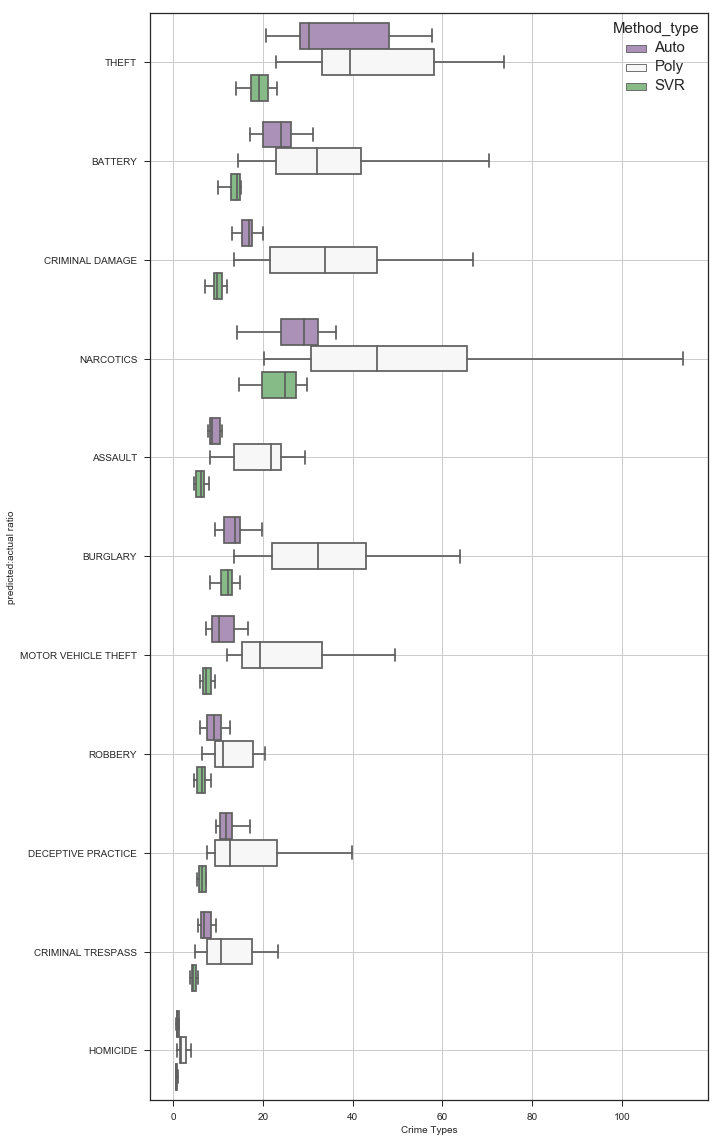

In [32]:
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(style="ticks")

#save_dir = os.path.join(os.getcwd()+"saveFigure")
#print(Fulldata.head())
data_comm_1 = []
data_comm_1 = Fulldata[(Fulldata['Crime_Type'] == 'THEFT') ]
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'BATTERY') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'CRIMINAL DAMAGE') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'NARCOTICS') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'ASSAULT') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'BURGLARY') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'MOTOR VEHICLE THEFT') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'ROBBERY') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'DECEPTIVE PRACTICE') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'ROBBERY') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'CRIMINAL TRESPASS') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'HOMICIDE') ])

# data_comm_2 = Fulldata[(Fulldata['Crime_Type'] == 'HOMICIDE') ]
axs = plt.subplots(ncols=1,figsize=(10,20))


#df = Fulldata['Computed_Value']
#Fulldata["norm_val"]=(df-df.min())/(df.max()-df.min()) * 1

#data_type1 = Fulldata[(Fulldata['Crime_Type'] == 'INTIMIDATION') ]
ax = sns.boxplot(x="Computed_Value", y="Crime_Type",data=data_comm_1,hue="Method_type",
            palette="PRGn", ax = axs[1],showfliers=False)

ax.set_xlabel("Crime Types",size=10)
ax.set_ylabel("predicted:actual ratio",size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True)
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='15')

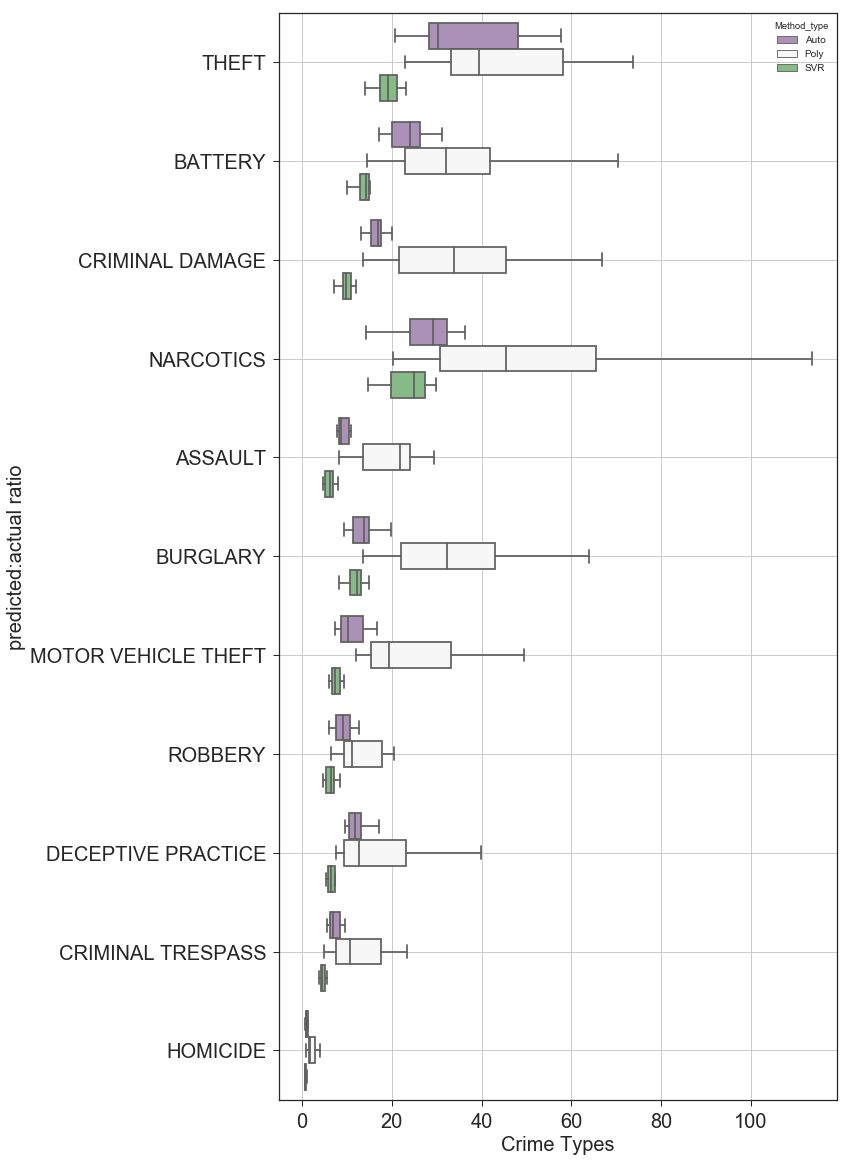

In [33]:
#top 10 crimes
data_comm_1 = []
data_comm_1 = Fulldata[(Fulldata['Crime_Type'] == 'THEFT') ]
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'BATTERY') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'CRIMINAL DAMAGE') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'NARCOTICS') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'ASSAULT') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'BURGLARY') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'MOTOR VEHICLE THEFT') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'ROBBERY') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'DECEPTIVE PRACTICE') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'ROBBERY') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'CRIMINAL TRESPASS') ])
data_comm_1 = data_comm_1.append(Fulldata[(Fulldata['Crime_Type'] == 'HOMICIDE') ])

# data_comm_2 = Fulldata[(Fulldata['Crime_Type'] == 'HOMICIDE') ]
axs = plt.subplots(ncols=1,figsize=(10,20))

ax = sns.boxplot(x="Computed_Value", y="Crime_Type",data=data_comm_1,hue="Method_type",
            palette="PRGn", ax = axs[1],showfliers=False)

ax.set_xlabel("Crime Types",size=20)
ax.set_ylabel("predicted:actual ratio",size=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True)

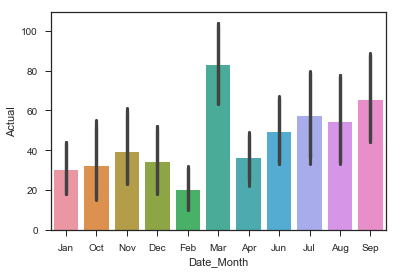

In [8]:
data_comm_2 = Fulldata[(Fulldata['Crime_Type'] == 'HOMICIDE') ]
#print(data_comm_2)
#data_comm_2.to_csv("homicide.csv")

#axs = plt.subplots(nrows=3,figsize=(50,20))

data_comm_a = data_comm_2[(data_comm_2['Method_type'] == 'Auto')]
sns.barplot(x="Date_Month", y="Actual",data=data_comm_a,estimator=sum)

data_comm_p = data_comm_2[(data_comm_2['Method_type'] == 'Poly')]
sns.barplot(x="Date_Month", y="Actual",data=data_comm_p,estimator=sum,)

data_comm_s = data_comm_2[(data_comm_2['Method_type'] == 'SVR')]
sns.barplot(x="Date_Month", y="Actual",data=data_comm_s,estimator=sum)

#sns.countplot(x="Date_Month", hue="Method_type",data=data_comm_2)

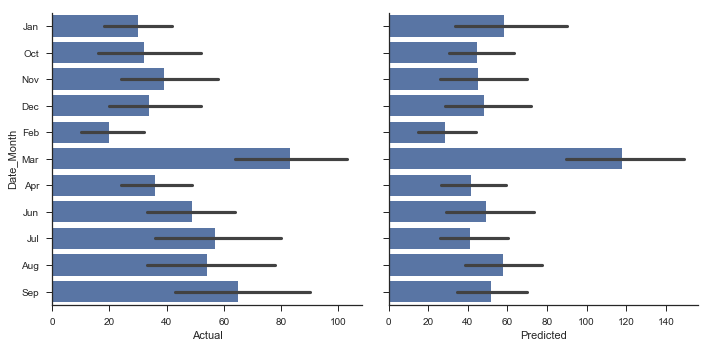

In [108]:
g = sns.PairGrid(data=data_comm_p,
                 y_vars=["Date_Month"],
                 x_vars=["Actual", "Predicted"],
                 aspect=1, size=5)
g.map(sns.barplot,estimator=sum);

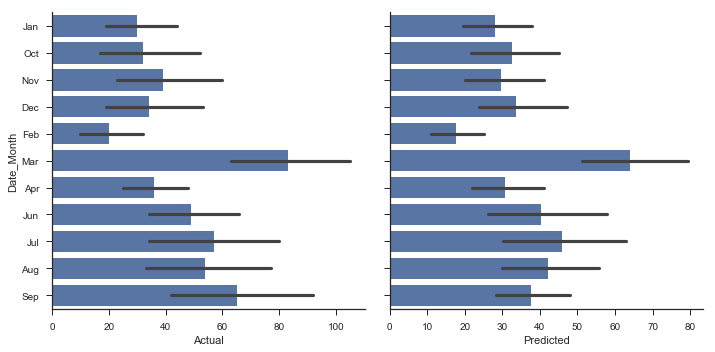

In [10]:
g = sns.PairGrid(data=data_comm_s,
                 y_vars=["Date_Month"],
                 x_vars=["Actual", "Predicted"],
                 aspect=1, size=5)
g.map(sns.barplot,estimator=sum);

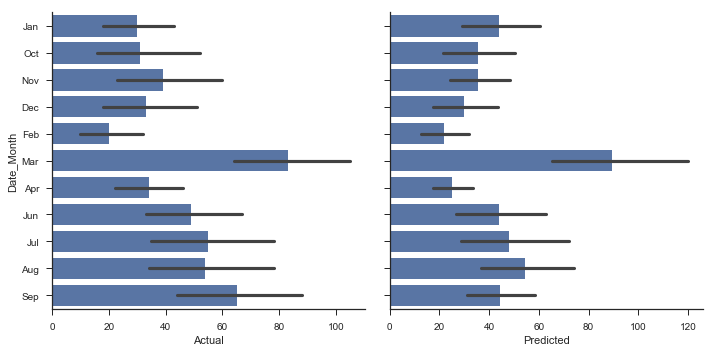

In [11]:
g = sns.PairGrid(data=data_comm_a,
                 y_vars=["Date_Month"],
                 x_vars=["Actual", "Predicted"],
                 aspect=1, size=5)
g.map(sns.barplot,estimator=sum);